<a href="https://colab.research.google.com/github/dli-invest/dli-invest.github.io/blob/master/ibook/notebooks/references/stock_diagrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [3]:
!pip install diagrams

     |████████████████████████████████| 15.2MB 291kB/s 
     |████████████████████████████████| 102kB 9.9MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=53aa6619abfdd6448dafcaa4109a74f80e47d71c0b3ba1c2ddc4ed4f24014f33
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [4]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

with Diagram("Grouped Workers", show=False, direction="TB"):
    ELB("lb") >> [EC2("worker1"),
                  EC2("worker2"),
                  EC2("worker3"),
                  EC2("worker4"),
                  EC2("worker5")] >> RDS("events")

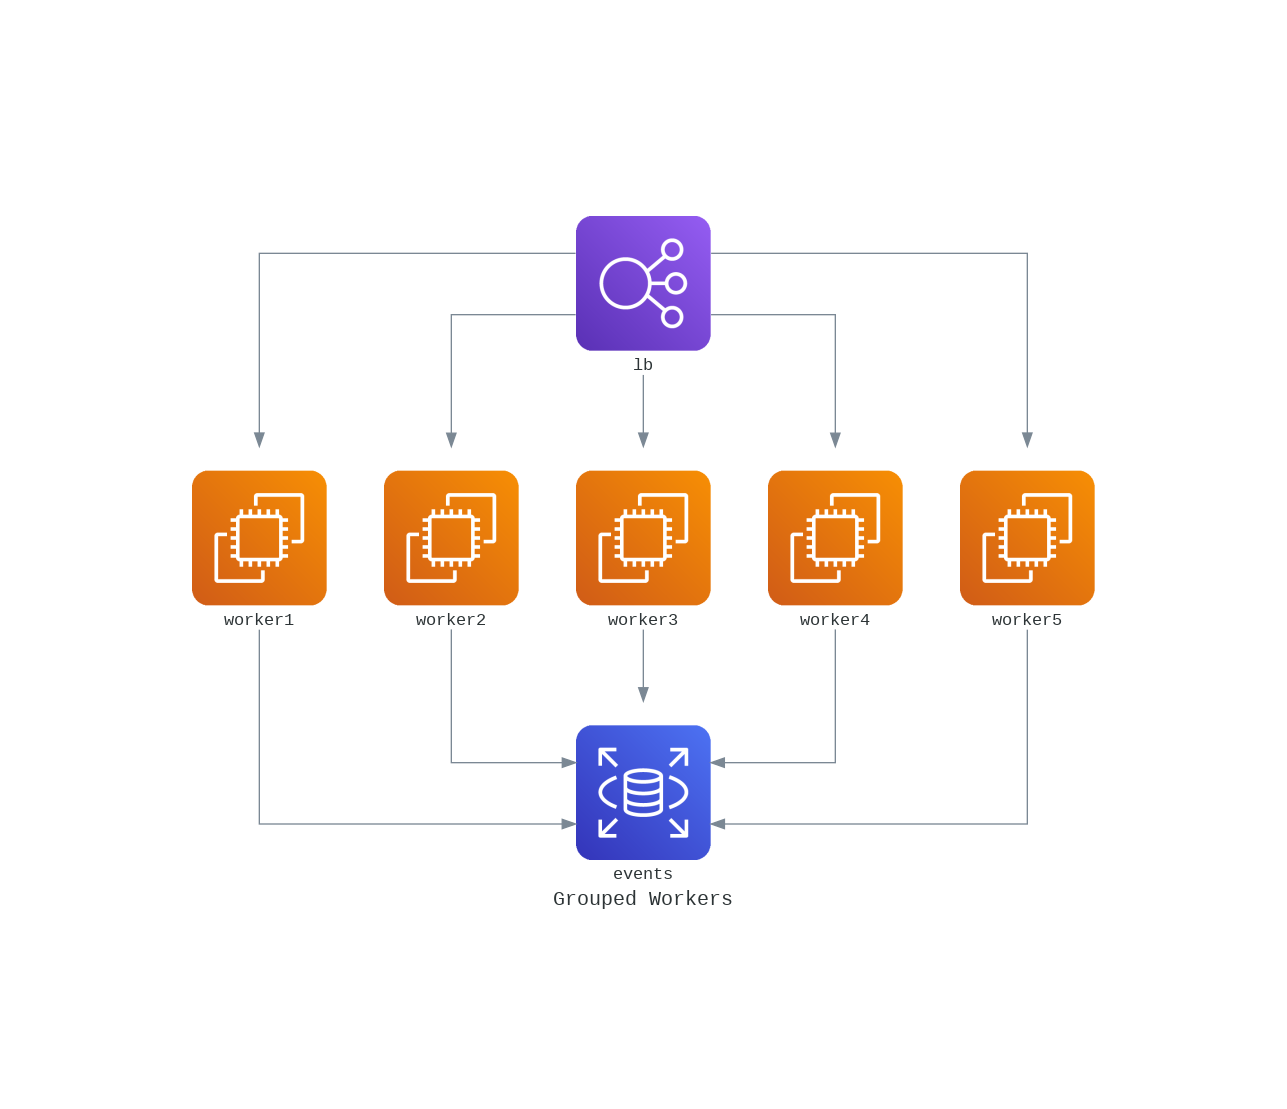

In [5]:
from IPython.display import Image
Image(filename='grouped_workers.png') 

In [42]:
from diagrams import Cluster, Diagram
from diagrams.programming.language import Python, Csharp, Go
from diagrams.programming.framework import Django, Flask
from diagrams.aws.network import Route53
from diagrams.saas.chat import Slack
from diagrams.gcp.compute import AppEngine, GCE, GCF, Run
from diagrams.gcp.devtools import Code, Build
from diagrams.elastic.elasticsearch import Elasticsearch
from diagrams.generic.database import SQL
from diagrams.generic.storage import Storage
from diagrams.generic.blank import Blank
from diagrams.generic.device import Tablet

with Diagram("stock-arch", show=False):
    nSlack = Slack('automatic updates')
    nPython = Python()
    nGo = Go()
    nCSharp = Csharp()
    with Cluster("Google Cloud"):
        gcp_build = Build("Auto Build")
        sapp = Run("stocks app")
        fstocks = Run('fstocks')
        utilities = GCF('utility')
        gcp_serverless = [sapp,
                     fstocks,
                     utilities
                    ]
        gcp_build - gcp_serverless

    nElasticsearch = Elasticsearch('news_db')
    dash = Flask()
    nPython >> dash
    # Convert to framework
    dash >> gcp_build
    nGo >> gcp_build
    nCSharp >> gcp_build

    fstocks >> nSlack

    sapp >> nElasticsearch

    nPython >> Storage('stock list')

    gcp_serverless >> Tablet('View')
    
    


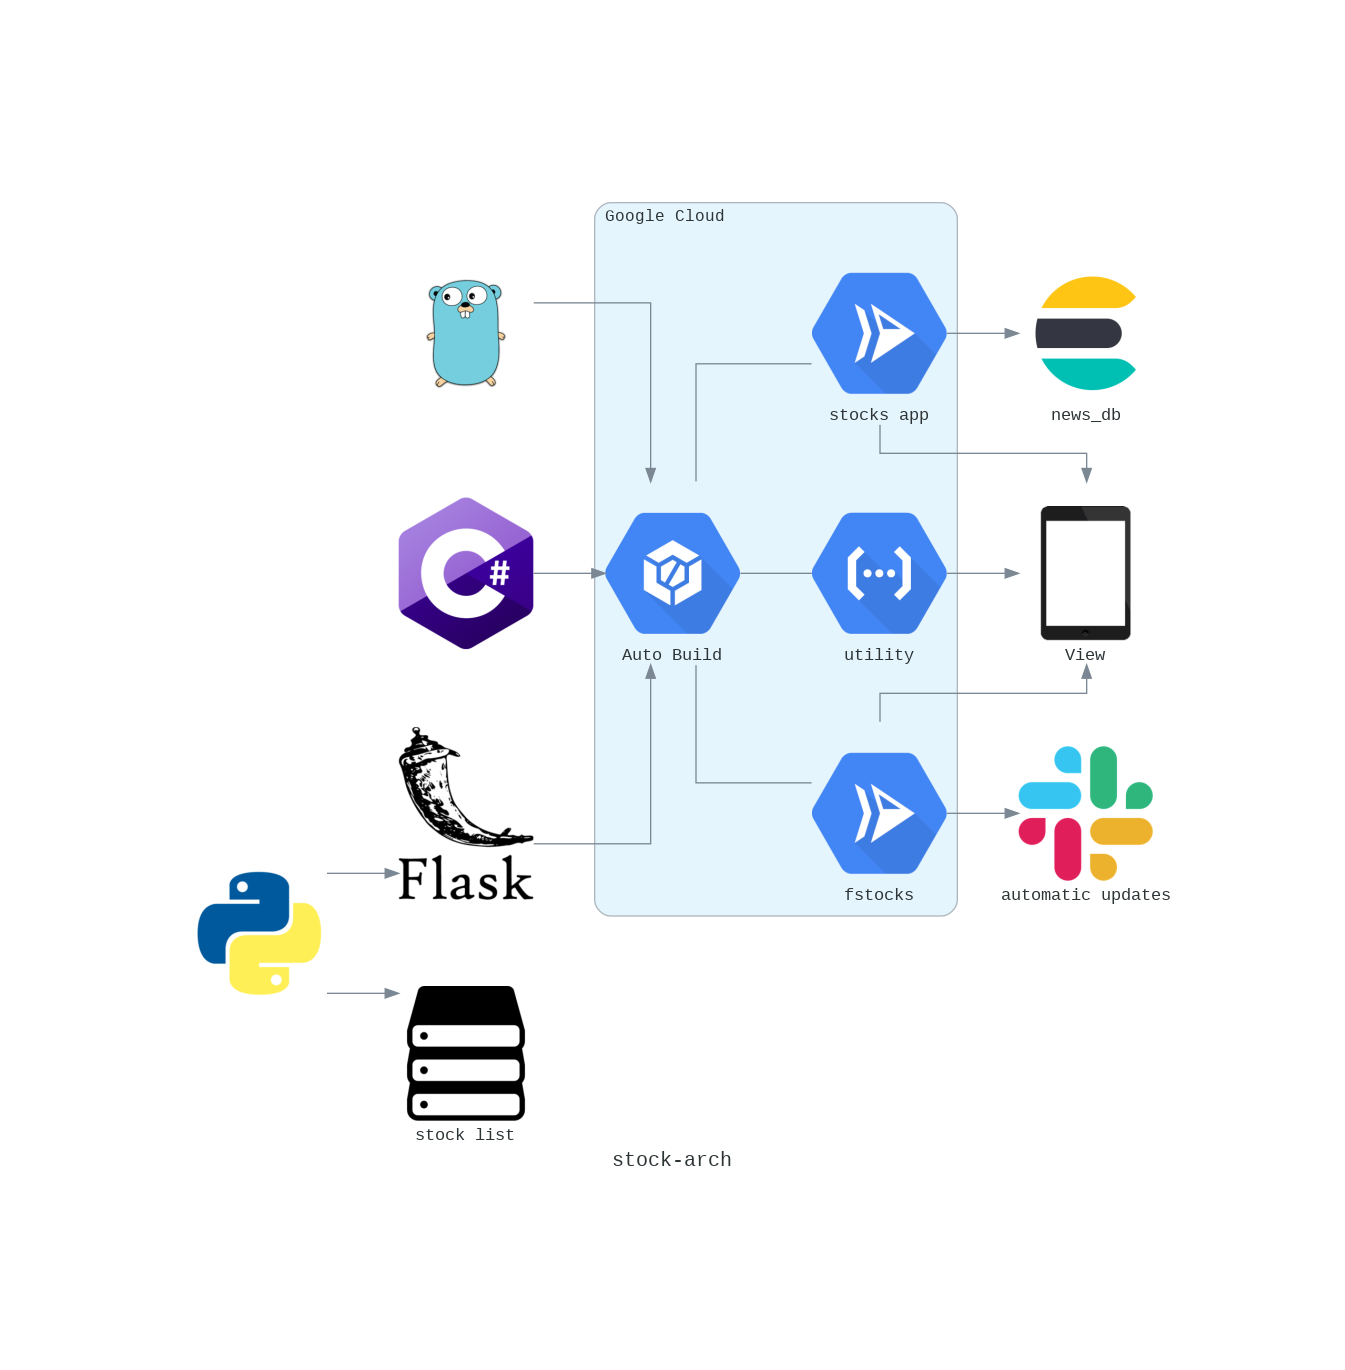

In [43]:
from IPython.display import Image
Image(filename='stock-arch.png') 